# Question 5

## Imports

In [4]:
import sklearn
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd

## Part (a): Load and preprocess the Dataset

In [114]:
def load_data(split_ratio=0.2):
    data = pd.read_excel("ccs/Concrete_Data.xls")
    # After outputing the plot, the indepent variables are the first 8 columns, and the dependent variable is the last column

    # Find missing values
    count = data.isnull().sum()
    # print(count)
    # Observe that there are no missing values, so no need to handle missing values

    # First 8 columns are the independent variables, and the last column is the dependent variable
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    assert X.shape[0] == y.shape[0]

    # Shuffle the data
    indices = np.random.permutation(X.shape[0])
    X = X[indices]
    y = y[indices]

    # Normalize the data using z-score normalization
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split the data into training and testing sets
    split_size = int(X.shape[0] * split_ratio)
    X_train = X[:-split_size]
    y_train = y[:-split_size]
    X_test = X[-split_size:]
    y_test = y[-split_size:]

    return X_train, y_train, X_test, y_test

In [115]:
X_train, y_train, X_test, y_test = load_data()

## Part (b): Implement Linear Regression

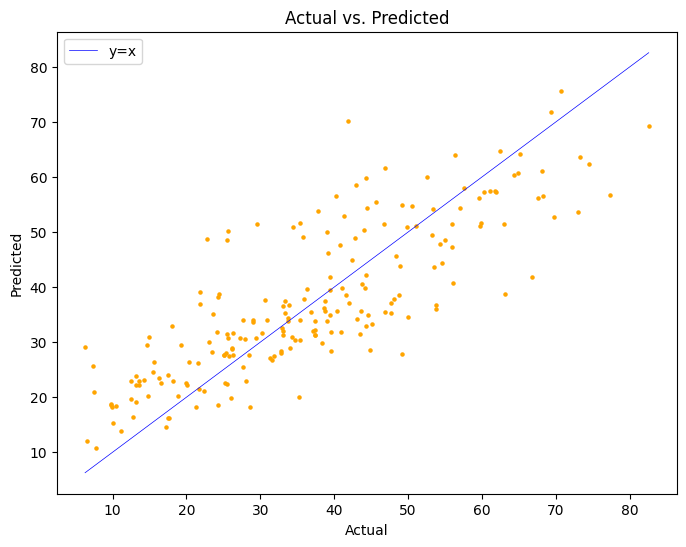

In [117]:
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
mse_lin = np.mean((y_pred_lin - y_test) ** 2)
r2_lin = 1 - mse_lin / np.var(y_test)

linspace = np.linspace(min(y_test), max(y_test), 100)

# Plot the predicted vs. actual values to visualize model fit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color="orange", s=5)
plt.plot(linspace, linspace, color='blue', linewidth=0.5, label="y=x")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()
plt.close()

## Part (c): Implementing Polynomial Regression

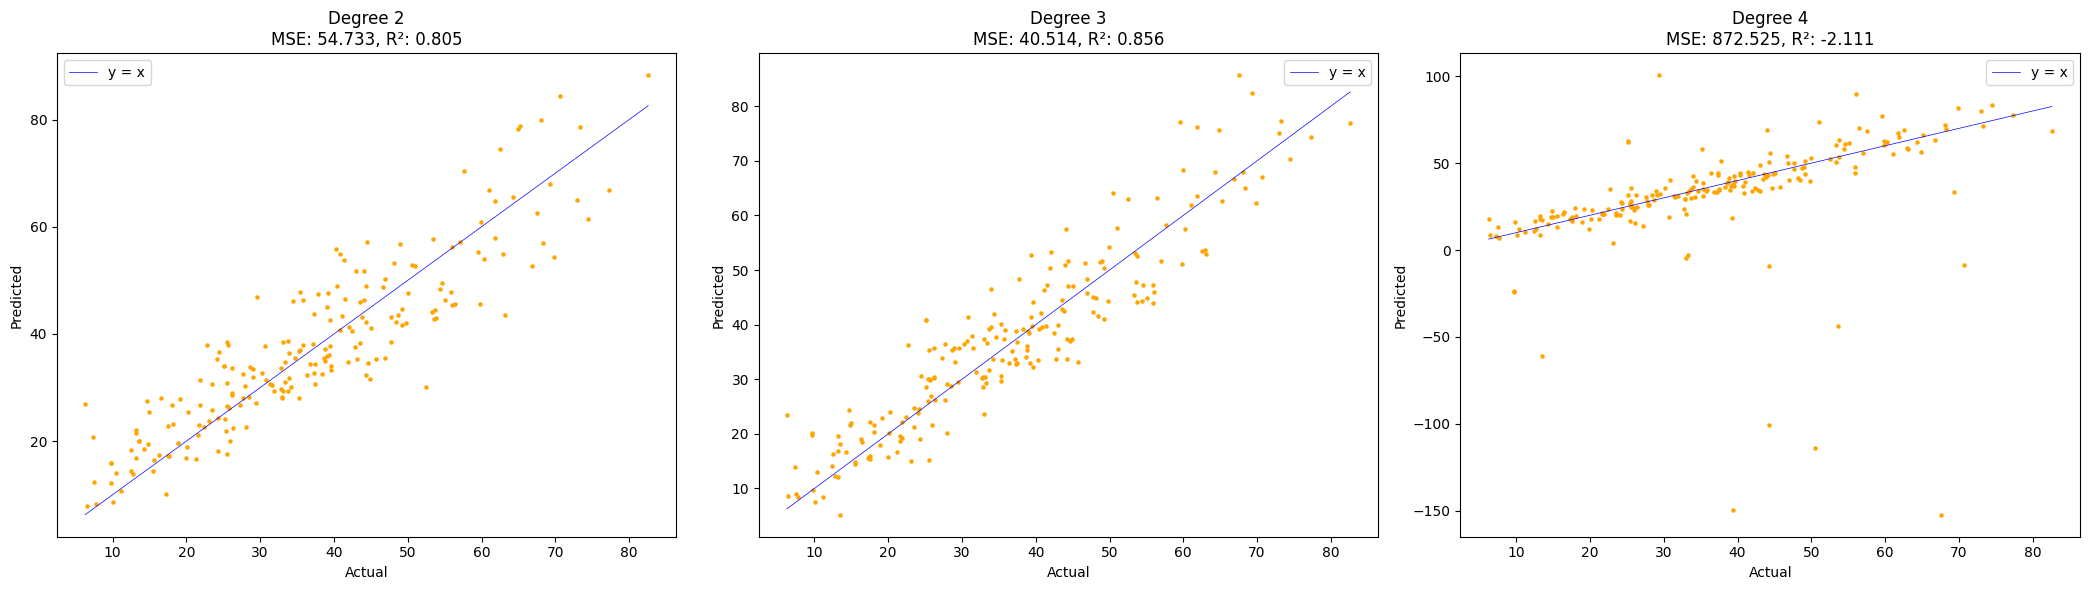

In [122]:
degrees = [2, 3, 4]
fig, axes = plt.subplots(1, len(degrees), figsize=(21, 6))
predictions_poly = {}
metrics_poly = {}

# Loop through each degree and corresponding axis
for ax, degree in zip(axes, degrees):
    poly = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred_poly = model.predict(X_test_poly)

    predictions_poly[degree] = y_pred_poly
    mse_poly = np.mean((y_pred_poly - y_test) ** 2)
    r2_poly = 1 - mse_poly / np.var(y_test)
    metrics_poly[degree] = {"MSE": mse_poly, "R²": r2_poly}

    linspace = np.linspace(min(y_test), max(y_test), 100)

    # Plot the predicted vs. actual values
    ax.scatter(y_test, y_pred_poly, color="orange", s=5)
    ax.plot(linspace, linspace, color="blue", linewidth=0.5, label="y = x")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f"Degree {degree}\nMSE: {mse_poly:.3f}, R²: {r2_poly:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()

## Part (d): Visualizing and Comparing Results

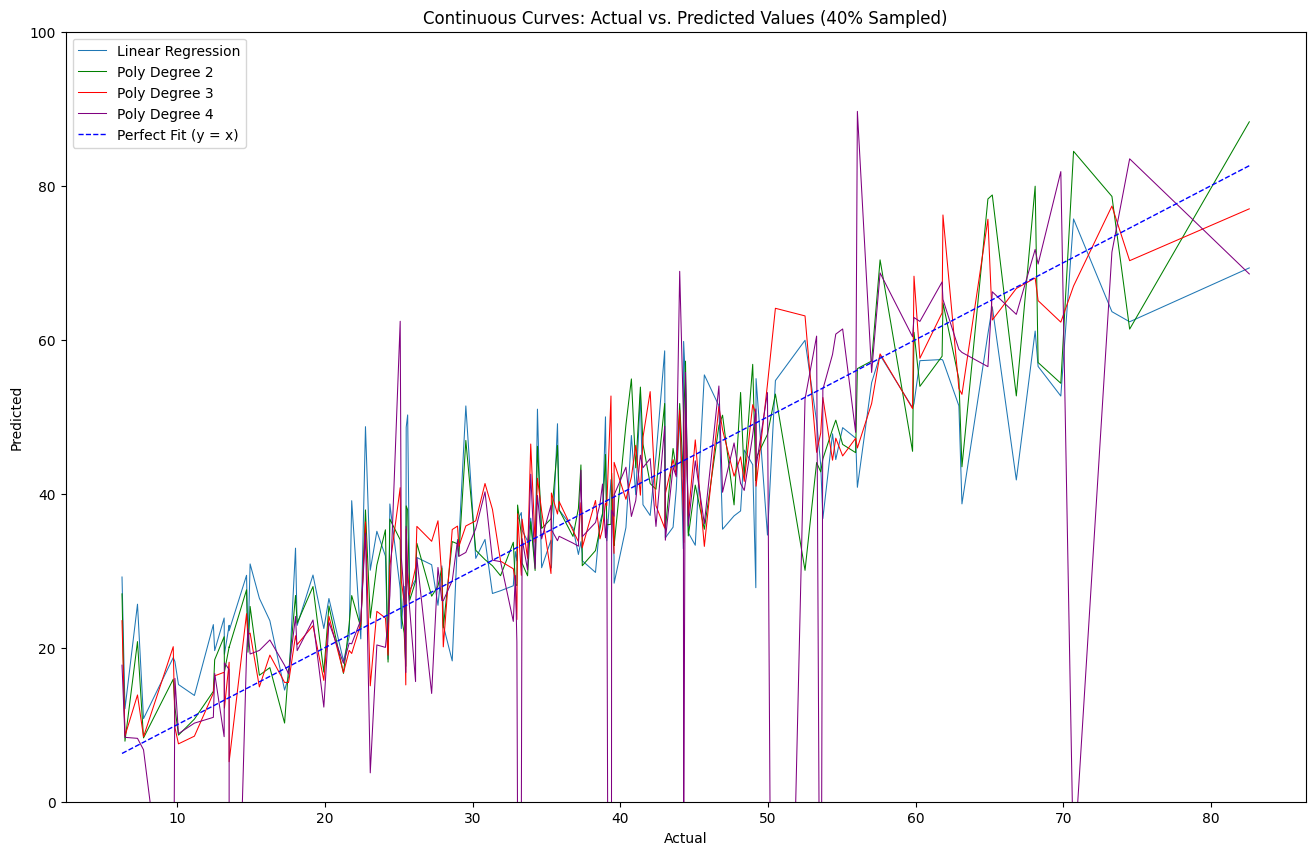

Metrics:
Linear Regression -> MSE: 92.032, R²: 0.672
Polynomial Regression (Degree 2) -> MSE: 54.733, R²: 0.805
Polynomial Regression (Degree 3) -> MSE: 40.514, R²: 0.856
Polynomial Regression (Degree 4) -> MSE: 872.525, R²: -2.111


In [143]:
plt.figure(figsize=(16, 10))

# Sort the test data for continuous line plotting
sort_idx = np.argsort(y_test)
y_test_sorted = y_test[sort_idx]

# Sample 40% of the points
num_points = len(y_test_sorted)
sample_size = int(num_points * 0.7)
sample_indices = np.linspace(0, num_points - 1, sample_size, dtype=int)

# Linear Regression Continuous Curve
plt.plot(
    y_test_sorted[sample_indices],
    y_pred_lin[sort_idx][sample_indices],
    label="Linear Regression",
    linewidth=0.75,
)

# Polynomial Regressions Continuous Curves
colors = ["green", "red", "purple"]
for color, degree in zip(colors, degrees):
    y_pred_sorted = predictions_poly[degree][sort_idx]
    plt.plot(
        y_test_sorted[sample_indices],
        y_pred_sorted[sample_indices],
        color=color,
        label=f"Poly Degree {degree}",
        linewidth=0.75,
    )

# Perfect fit line (y = x)
linspace = np.linspace(min(y_test), max(y_test), 100)
plt.plot(
    linspace,
    linspace,
    color="blue",
    linestyle="--",
    linewidth=1,
    label="Perfect Fit (y = x)",
)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Continuous Curves: Actual vs. Predicted Values (40% Sampled)")
plt.legend()
plt.ylim(0, 100)
plt.show()

print("Metrics:")
print("Linear Regression -> MSE: {:.3f}, R²: {:.3f}".format(mse_lin, r2_lin))
for degree in degrees:
    print(
        "Polynomial Regression (Degree {}) -> MSE: {:.3f}, R²: {:.3f}".format(
            degree, metrics_poly[degree]["MSE"], metrics_poly[degree]["R²"]
        )
    )

## Part (e): Bias-Variance Tradeoff Analysis

1) The linear regression model has a high bias and a low variance because it fits a linear relationship. On the other hand, a higher-degree polynomial, such as the degree 4 polynomial regression model, has low bias because it can closely follow the training data. <br/> <br/>
The linear regression model would **underfit** the data, while the high degree polynomial would **overfit** the data.<br/> <br/>
So, to find a good mix, a low degree polynomial would have a low bais and variance. This is also visible in the results as it have the best R2 and MSE metrics

<br/>

2) Higher-degree polynomials have many parameters, which gives them excessive flexibility. They can fit even the noise in the training data instead of just the underlying trend. This overfitting results in high variance and poor generalization to new data.